# Problem Statement:-
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Churn_Analysis.csv")
df1=df.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Checking for Null Values:-

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Their is no Null Values in the Dataset. But on Checking we can see that the TotalCharges Column has some null values.

In [6]:
#We have converted Total Charges from str to float
df["TotalCharges"]=df["TotalCharges"].apply(lambda x: float(x) if len(x)>1 else np.nan)

In [7]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Now we can see the null values in the Total Charges column.

In [8]:
df.loc[df["TotalCharges"].isna(),["tenure","MonthlyCharges", "TotalCharges"]]

,tenure,MonthlyCharges,TotalCharges
488,0,52.55,NaN
753,0,20.25,NaN
936,0,80.85,NaN
1082,0,25.75,NaN
1340,0,56.05,NaN
3331,0,19.85,NaN
3826,0,25.35,NaN
4380,0,20.00,NaN
5218,0,19.70,NaN
6670,0,73.35,NaN


In [9]:
df["TotalCharges"].fillna(0,inplace=True)
df.isnull().sum().sum()

0

Now the Null Values is treated we can carry on with our further steps

In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# EDA:-

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


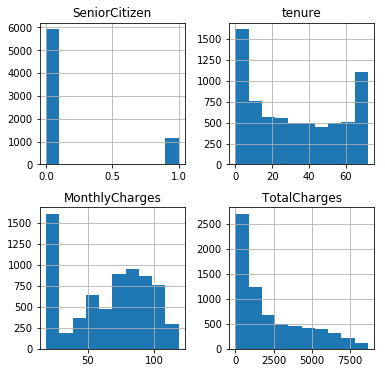

In [12]:
df.hist(figsize=(6,6))
plt.show()

In [13]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

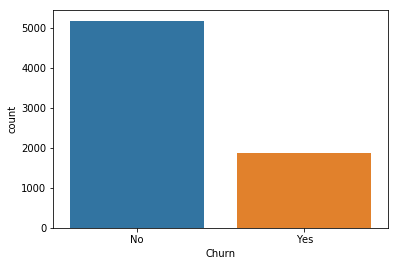

In [14]:
sns.countplot(df['Churn'])
plt.show()

In [15]:
cat_cols=[col for col in df.columns if df[col].nunique()<10]
num_cols=[col for col in df.columns if col not in cat_cols and df[col].dtype!='O']
print("No. of Categorical Columns:",len(cat_cols),"\nNumber of Numerical Columns:",len(num_cols))

No. of Categorical Columns: 17 
Number of Numerical Columns: 3


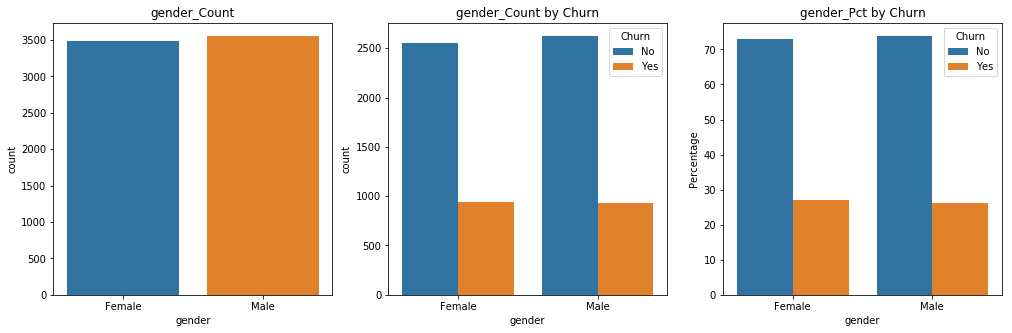

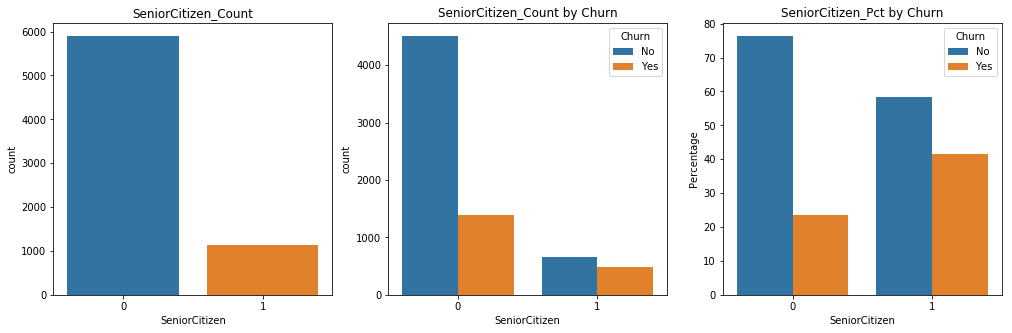

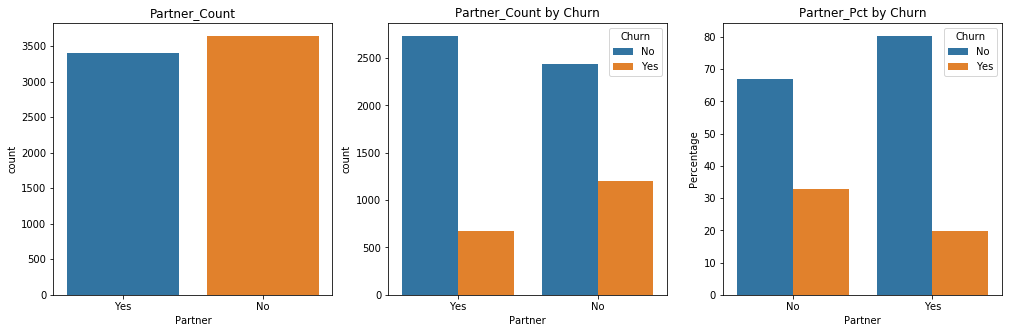

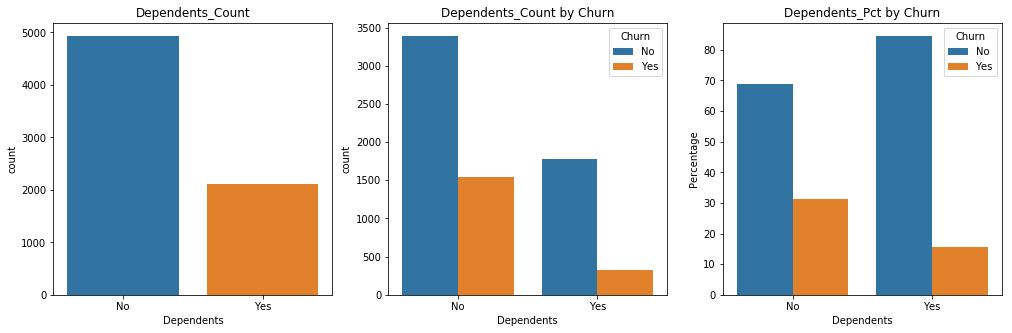

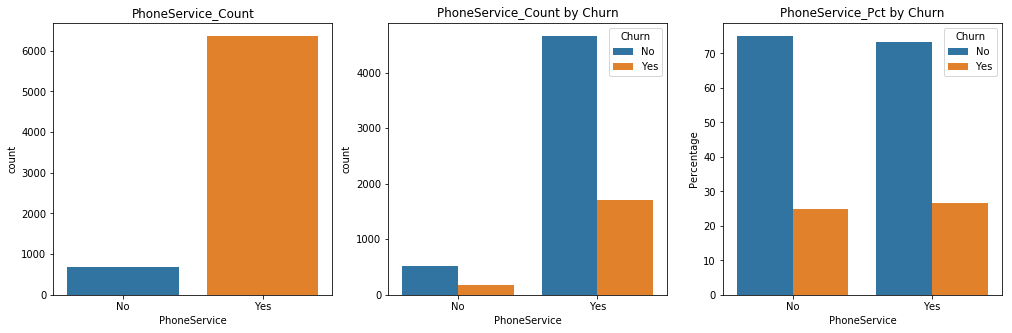

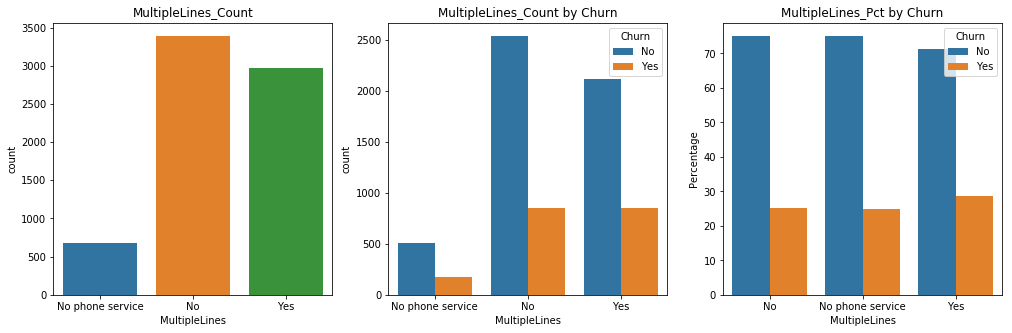

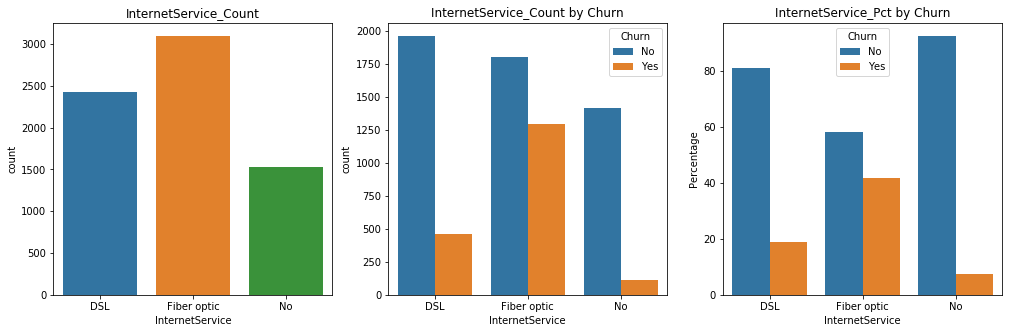

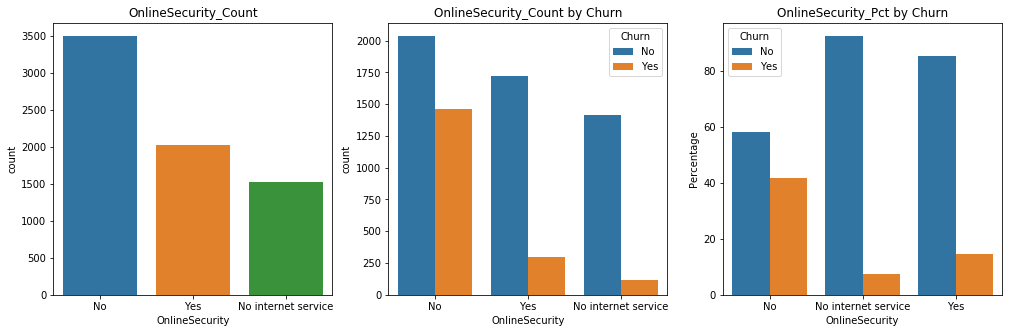

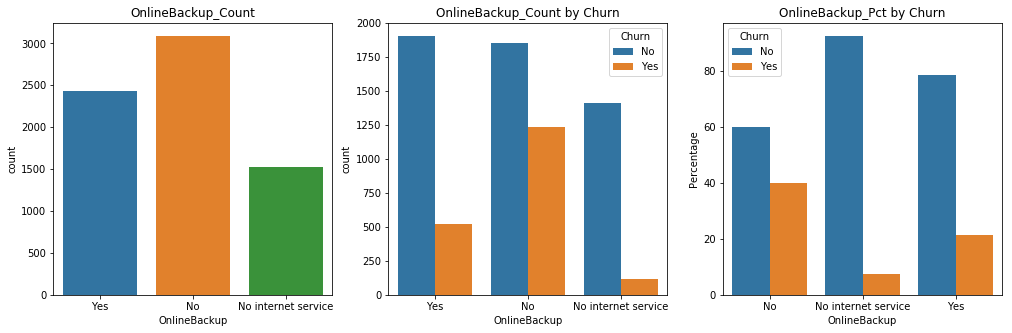

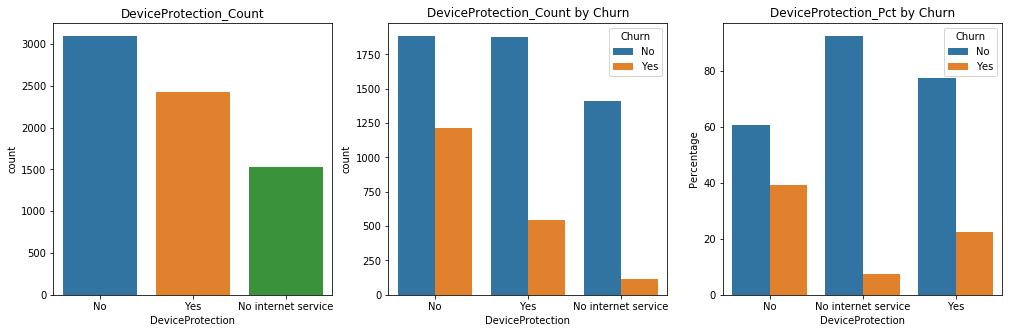

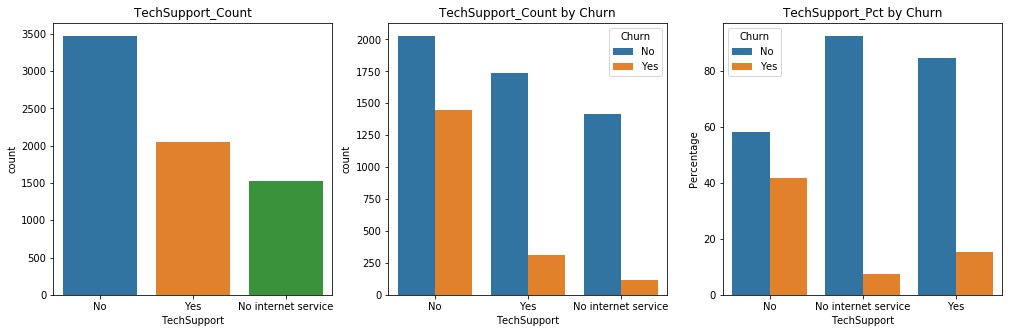

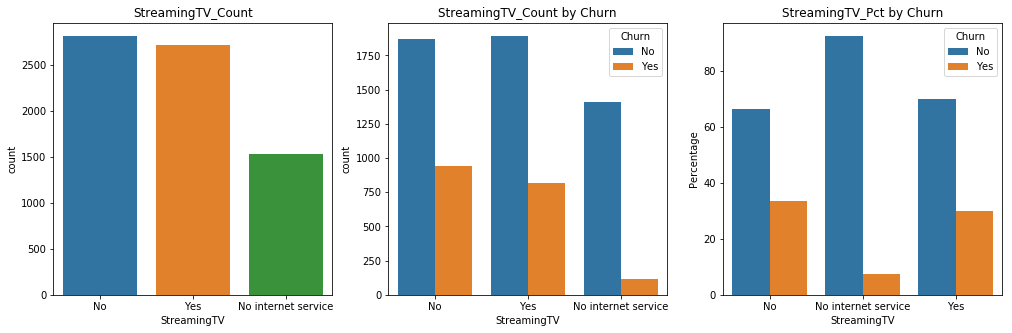

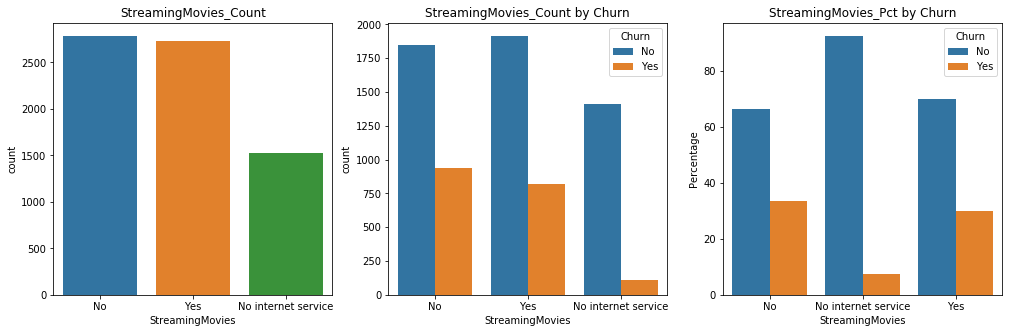

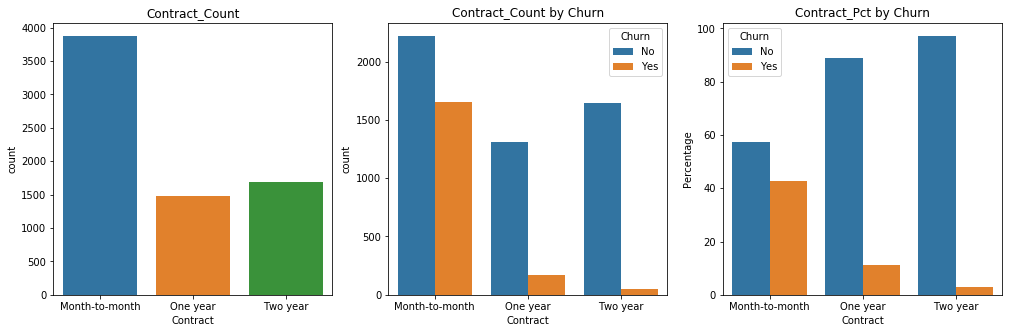

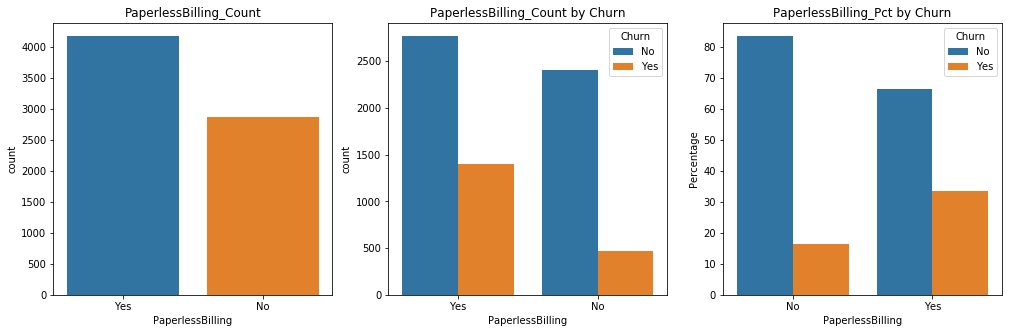

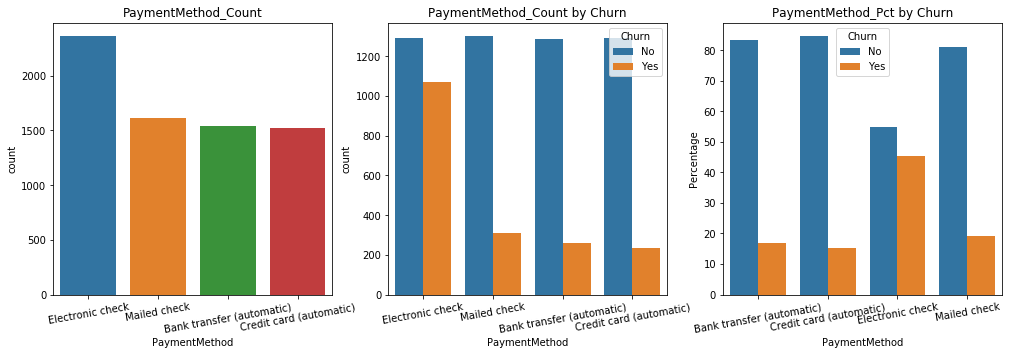

In [16]:
plot_col=[col for col in cat_cols if col!="Churn"]
for col in plot_col:
    fig, ax=plt.subplots(1,3,figsize=(17,5))
    data1=(df.groupby(col)["Churn"].value_counts(normalize=True)*100).rename("Percentage").reset_index()
    sns.countplot(ax=ax[0],x=col, data=df)
    ax[0].set_title(col+"_Count")
    sns.countplot(ax=ax[1],x=col, data=df, hue="Churn")
    ax[1].set_title(col+"_Count by Churn")
    sns.barplot(ax=ax[2],x=col, y="Percentage", data=data1, hue="Churn")
    ax[2].set_title(col+"_Pct by Churn")

    if col =="PaymentMethod":
          for i in range(3):
            ax[i].tick_params(axis="x",labelrotation=10)

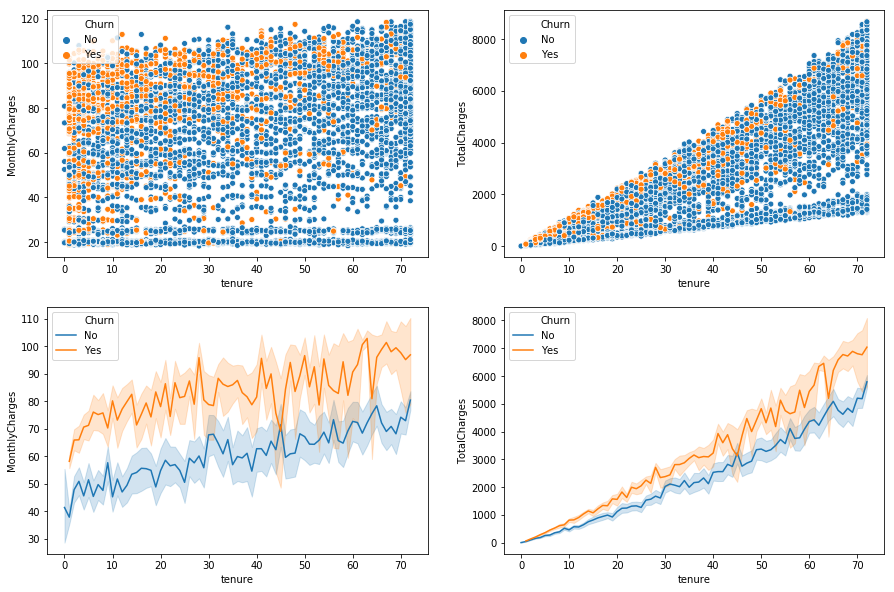

In [17]:
fig , ax=plt.subplots(2,2, figsize=(15,10))
for i,col in enumerate(["MonthlyCharges","TotalCharges"]):
    sns.scatterplot(ax=ax[0,i],x="tenure", y=col,data=df,hue="Churn")
    sns.lineplot(ax=ax[1,i],x="tenure", y=col,data=df,hue="Churn")

# Correlation:-

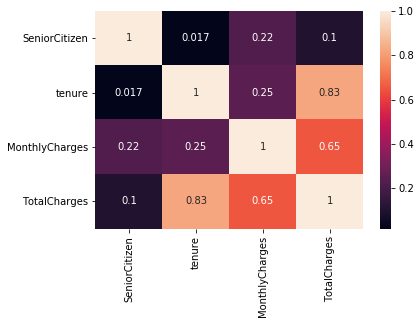

In [18]:
sns.heatmap(df.corr(),annot=True)
plt.show()

## Feature Engineering

In [19]:
# New Features from customerID
 
df["ID_Fig1"]=df.customerID.apply(lambda x: int(x[0]))
df["ID_Fig2"]=df.customerID.apply(lambda x: int(x[1]))
df["ID_Fig3"]=df.customerID.apply(lambda x: int(x[2]))
df["ID_Fig4"]=df.customerID.apply(lambda x: int(x[3]))

## Letter List
letter = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

df["ID_Let1"]=df.customerID.apply(lambda x: letter.index(x[5])) # index number of the letter
df["ID_Let2"]=df.customerID.apply(lambda x: letter.index(x[6]))
df["ID_Let3"]=df.customerID.apply(lambda x: letter.index(x[7]))
df["ID_Let4"]=df.customerID.apply(lambda x: letter.index(x[8]))

In [20]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalCharges,Churn,ID_Fig1,ID_Fig2,ID_Fig3,ID_Fig4,ID_Let1,ID_Let2,ID_Let3,ID_Let4
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,29.85,No,7,5,9,0,21,7,21,4
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,1889.50,No,5,5,7,5,6,13,21,3
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,108.15,Yes,3,6,6,8,16,15,24,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,1840.75,No,7,7,9,5,2,5,14,2
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,151.65,Yes,9,2,3,7,7,16,8,19


In [21]:
# MonthlyCharges/Tenure
df["New_MCharg_Tenure"]=df.MonthlyCharges/(df.tenure)
df["New_TCharg_Tenure"]=df.TotalCharges/(df.tenure)
df["New_TCharg_Tenure"].fillna(0,inplace=True)

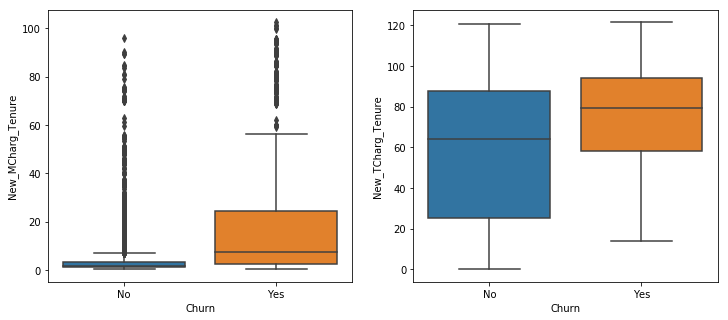

In [22]:
fig, ax=plt.subplots(1,2,figsize=(12,5))
sns.boxplot(ax=ax[0],y=df["New_MCharg_Tenure"], x=df.Churn)
sns.boxplot(ax=ax[1],y=df["New_TCharg_Tenure"], x=df.Churn)
plt.show()

In [23]:
def outliers_view(df,num_treshould = 20, q1=0.25,q3=0.75,visul = False):
    num_cols = [x for x in df.columns if (df[x].dtype != "O") & (df[x].nunique() > num_treshould)]
    table = pd.DataFrame()
    outliers_dict = {}
    if visul ==True:
        for i in num_cols:
            sns.boxplot(y=df[i])
            plt.xlabel(i)
            plt.show()

    for i in range(len(num_cols)):
        q_1 = df[num_cols[i]].quantile(q1)
        q2 = df[num_cols[i]].quantile(0.5)
        q_3 = df[num_cols[i]].quantile(q3)
        iqr = q_3 - q_1
        up = q_3 + 1.5 * iqr
        low = q_1 - 1.5*iqr
        outliers_count = len(df[(df[num_cols[i]] < low) | (df[num_cols[i]] > up)][num_cols[i]])

        table.loc[num_cols[i],"low_limit"] = low
        table.loc[num_cols[i], q1] = q_1
        table.loc[num_cols[i], "mean"] = df[num_cols[i]].mean()
        table.loc[num_cols[i], "median"] = q2
        table.loc[num_cols[i], q3] = q_3
        table.loc[num_cols[i], "up_limit"] = up
        table.loc[num_cols[i], "count"] = outliers_count
        table.loc[num_cols[i], "percent"] = outliers_count/df.shape[0]*100
        outliers_dict[num_cols[i]] = df[(df[num_cols[i]] < low) | (df[num_cols[i]] > up)][num_cols[i]]
    outliers_values =pd.DataFrame.from_dict(outliers_dict)
    outliers_values = outliers_values[[col for col in outliers_values.columns if outliers_values[col].notnull().sum() != 0]]

    return table, outliers_values

In [24]:
outliers_view(df,q3=0.95)

(                     low_limit        0.25         mean   median         0.95  \
 tenure              -85.500000    9.000000    32.371149    29.00    72.000000   
 MonthlyCharges      -72.350000   35.500000    64.761692    70.35   107.400000   
 TotalCharges      -9385.162500  398.550000  2279.734304  1394.55  6921.025000   
 ID_Let1             -21.000000    6.000000    12.225756    12.00    24.000000   
 ID_Let2             -21.000000    6.000000    12.445833    12.00    24.000000   
 ID_Let3             -21.000000    6.000000    12.598609    13.00    24.000000   
 ID_Let4             -21.000000    6.000000    12.481187    13.00    24.000000   
 New_MCharg_Tenure   -65.729766    1.278093          inf     2.15    45.950000   
 New_TCharg_Tenure   -72.692578   35.649000    64.698218    70.30   107.876719   
 
                        up_limit  count   percent  
 tenure               166.500000    0.0  0.000000  
 MonthlyCharges       215.250000    0.0  0.000000  
 TotalCharges       16

In [25]:
def outlier_press( dataframe, column=all,num_treshould=20,q1=0.25,q3=0.75):
    if column == all:
        columns =outliers_view(dataframe,num_treshould=num_treshould,q1=q1,q3=q3)[1].columns
    else:
        columns = column

    for col in columns:
        indexes = outliers_view(dataframe,num_treshould=num_treshould,q1=q1,q3=q3)[1][col]\
            [outliers_view(dataframe,num_treshould=num_treshould,q1=q1,q3=q3)[1][col].notnull()].index
        low_limit = outliers_view(dataframe,num_treshould=num_treshould,q1=q1,q3=q3)[0].loc[col, "low_limit"]
        up_limit = outliers_view(dataframe,num_treshould=num_treshould,q1=q1,q3=q3)[0].loc[col, "up_limit"]
        dataframe.loc[indexes, col] = dataframe.loc[indexes, col].\
            apply(lambda x: low_limit if x < low_limit else up_limit)
    df1=dataframe
    return df1

In [26]:
df=outlier_press(df,["New_MCharg_Tenure"],q3=0.90)

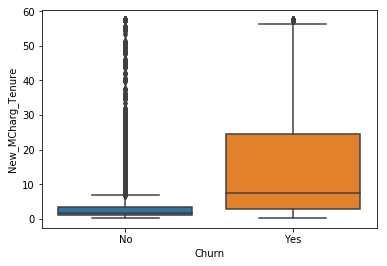

In [27]:
sns.boxplot(y=df["New_MCharg_Tenure"], x=df.Churn)
plt.show()

In [28]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,ID_Fig1,ID_Fig2,ID_Fig3,ID_Fig4,ID_Let1,ID_Let2,ID_Let3,ID_Let4,New_MCharg_Tenure,New_TCharg_Tenure
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,7,5,9,0,21,7,21,4,29.850,29.850000
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,5,5,7,5,6,13,21,3,1.675,55.573529
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,3,6,6,8,16,15,24,1,26.925,54.075000
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,7,7,9,5,2,5,14,2,0.940,40.905556
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,9,2,3,7,7,16,8,19,35.350,75.825000


In [29]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,ID_Fig1,ID_Fig2,ID_Fig3,ID_Fig4,ID_Let1,ID_Let2,ID_Let3,ID_Let4,New_MCharg_Tenure,New_TCharg_Tenure
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,4.494818,4.528752,4.502769,4.548914,12.225756,12.445833,12.598609,12.481187,8.011249,64.698218
std,0.368612,24.559481,30.090047,2266.794470,2.837664,2.889446,2.891209,2.896930,7.538645,7.452377,7.502799,7.471486,13.692474,30.270670
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.268056,0.000000
25%,0.000000,9.000000,35.500000,398.550000,2.000000,2.000000,2.000000,2.000000,6.000000,6.000000,6.000000,6.000000,1.278093,35.649000
50%,0.000000,29.000000,70.350000,1394.550000,4.000000,5.000000,4.000000,5.000000,12.000000,12.000000,13.000000,13.000000,2.150000,70.300000
75%,0.000000,55.000000,89.850000,3786.600000,7.000000,7.000000,7.000000,7.000000,19.000000,19.000000,19.000000,19.000000,6.641190,90.174158
max,1.000000,72.000000,118.750000,8684.800000,9.000000,9.000000,9.000000,9.000000,25.000000,25.000000,25.000000,25.000000,57.382860,121.400000


In [30]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,ID_Fig1,ID_Fig2,ID_Fig3,ID_Fig4,ID_Let1,ID_Let2,ID_Let3,ID_Let4,New_MCharg_Tenure,New_TCharg_Tenure
SeniorCitizen,1.000000,0.016567,0.220173,0.103006,-0.001369,-0.008644,0.001711,0.020099,0.004711,0.012141,-0.010044,0.009461,0.030093,0.218275
tenure,0.016567,1.000000,0.247900,0.826178,0.009113,-0.013728,0.014129,-0.004776,-0.009186,-0.010702,-0.015420,0.002195,-0.580912,0.249391
MonthlyCharges,0.220173,0.247900,1.000000,0.651174,-0.002036,-0.020497,0.009870,0.002458,-0.009400,-0.001673,-0.031728,0.011410,0.028915,0.994355
TotalCharges,0.103006,0.826178,0.651174,1.000000,0.002133,-0.021016,0.018503,0.004010,-0.014174,-0.011186,-0.025691,0.006380,-0.426096,0.651435
ID_Fig1,-0.001369,0.009113,-0.002036,0.002133,1.000000,0.011384,-0.003568,0.010607,0.012408,0.015769,-0.004236,-0.011714,-0.006936,-0.000626
ID_Fig2,-0.008644,-0.013728,-0.020497,-0.021016,0.011384,1.000000,-0.009269,0.001253,0.002662,-0.013561,-0.004384,-0.010518,0.010961,-0.017394
ID_Fig3,0.001711,0.014129,0.009870,0.018503,-0.003568,-0.009269,1.000000,-0.006217,0.000551,0.000075,0.028767,0.031641,-0.001693,0.010043
ID_Fig4,0.020099,-0.004776,0.002458,0.004010,0.010607,0.001253,-0.006217,1.000000,-0.008562,0.027609,-0.004013,-0.020596,-0.006385,0.002972
ID_Let1,0.004711,-0.009186,-0.009400,-0.014174,0.012408,0.002662,0.000551,-0.008562,1.000000,0.005574,-0.003539,-0.009757,-0.005582,-0.007603
ID_Let2,0.012141,-0.010702,-0.001673,-0.011186,0.015769,-0.013561,0.000075,0.027609,0.005574,1.000000,-0.009940,-0.009003,-0.003207,-0.002058


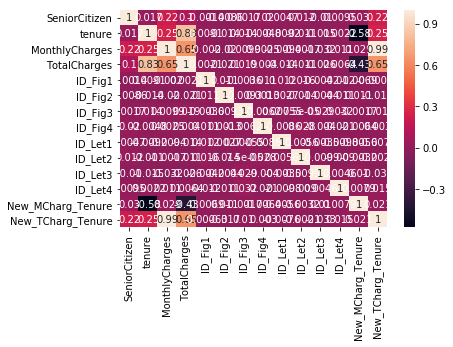

In [31]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [32]:
from sklearn import preprocessing
def label_encoder(dataframe, binary_cols):
    for col in binary_cols:
        labelencoder = preprocessing.LabelEncoder()
        dataframe[col] = labelencoder.fit_transform(dataframe[col])
    return dataframe
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [33]:
binary_cols=[col for col in cat_cols if df[col].nunique()==2]
notbinary_cat_cols=[col for col in cat_cols if col not in binary_cols]

In [34]:
binary_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [35]:
notbinary_cat_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [36]:
label_encoder(df,binary_cols)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,ID_Fig1,ID_Fig2,ID_Fig3,ID_Fig4,ID_Let1,ID_Let2,ID_Let3,ID_Let4,New_MCharg_Tenure,New_TCharg_Tenure
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,7,5,9,0,21,7,21,4,29.850000,29.850000
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,5,5,7,5,6,13,21,3,1.675000,55.573529
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,3,6,6,8,16,15,24,1,26.925000,54.075000
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,7,7,9,5,2,5,14,2,0.940000,40.905556
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,9,2,3,7,7,16,8,19,35.350000,75.825000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,Yes,DSL,Yes,...,6,8,4,0,17,4,18,21,3.533333,82.937500
7039,2234-XADUH,0,0,1,1,72,1,Yes,Fiber optic,No,...,2,2,3,4,23,0,3,20,1.433333,102.262500
7040,4801-JZAZL,0,0,1,1,11,0,No phone service,DSL,Yes,...,4,8,0,1,9,25,0,25,2.690909,31.495455
7041,8361-LTMKD,1,1,1,0,4,1,Yes,Fiber optic,No,...,8,3,6,1,11,19,12,10,18.600000,76.650000


In [37]:
df=one_hot_encoder(df,notbinary_cat_cols)

# Model Building:-

In [38]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, recall_score

C:\Users\Arsh\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
C:\Users\Arsh\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_sta

In [39]:
y=df["Churn"]
x=df.drop(["customerID","Churn"],axis=1)
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.20)

In [40]:
models = [('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('GBM', GradientBoostingClassifier()),
          ("XGBoost", XGBClassifier()),
          ("LightGBM", LGBMClassifier()),
          ("CatBoost", CatBoostClassifier(verbose=False)),
          ("LOG",LogisticRegression())]

In [41]:
test_scor=[]
train_scor=[]
name1=[]
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_score=accuracy_score(y_pred, y_test) 
    y_pred_train=model.predict(X_train)
    train_score=accuracy_score(y_pred_train, y_train)
    name1.append(name)
    test_scor.append(test_score)
    train_scor.append(train_score)
    
base_model_score=pd.DataFrame({"indeks":name1,"Test_Scor":test_scor,"Train_Scor":train_scor})
base_model_score.set_index("indeks")

C:\Users\Arsh\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:907: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
C:\Users\Arsh\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the

C:\Users\Arsh\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\Arsh\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1302: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.object)
C:\Users\A

C:\Users\Arsh\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Arsh\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Arsh\

C:\Users\Arsh\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Arsh\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Arsh\

C:\Users\Arsh\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Arsh\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Arsh\

C:\Users\Arsh\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Arsh\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1162: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert sample_mask.dtype == np.bool
C:\Users\Arsh\

[00:37:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Arsh\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Arsh\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

,Test_Scor,Train_Scor
indeks,,
KNN,0.770050,0.831558
CART,0.735983,1.000000
RF,0.797019,0.984558
GBM,0.807665,0.836351
XGBoost,0.784954,0.994320
LightGBM,0.794180,0.937345
CatBoost,0.801278,0.928293
LOG,0.809084,0.808484


In [42]:
model=RandomForestClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)
test_score=accuracy_score(y_pred, y_test) 
y_pred_train=model.predict(X_train)
train_score=accuracy_score(y_pred_train, y_train)

C:\Users\Arsh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:487: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Users\Arsh\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

In [43]:
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

[[927 203]
 [102 177]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1130
           1       0.47      0.63      0.54       279

   micro avg       0.78      0.78      0.78      1409
   macro avg       0.68      0.73      0.70      1409
weighted avg       0.81      0.78      0.80      1409



In [44]:
recall_score(y_test, y_pred, average=None)

array([0.90087464, 0.46578947])

In [45]:
def plot_importance(model, X, num=x.shape[0]):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': X.columns})
    plt.figure(figsize=(10, 15))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.savefig('importances-01.png')
    plt.show()

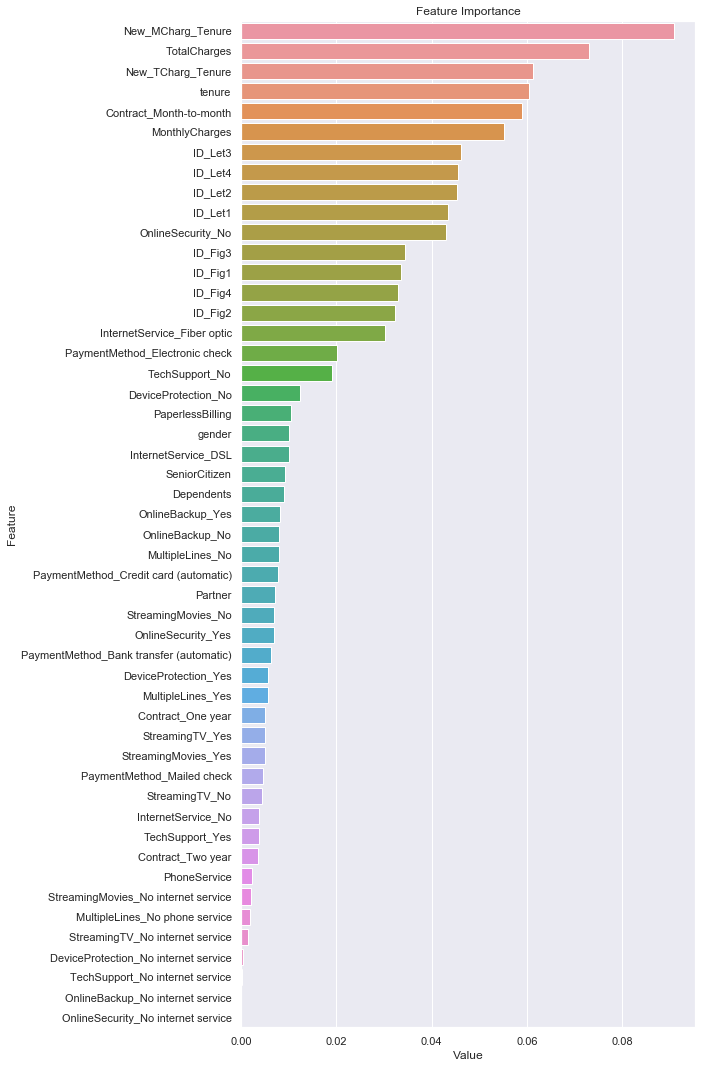

In [46]:
plot_importance(model, X_test)

In [47]:
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
iris = datasets.load_iris()
X, y = iris.data, iris.target

C:\Users\Arsh\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Users\Arsh\Anaconda3\lib\site-packages\sklearn\datasets\base.py:242: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note

In [49]:
OneVsRestClassifier(LinearSVC(random_state=0)).fit(X, y).predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# HyperParameter Tuning:-

In [50]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20],
    }

In [57]:
rf=RandomForestClassifier()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(X_train,y_train)

# best parameter
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\Arsh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:665: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\Users\Arsh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review y

C:\Users\Arsh\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Arsh\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the re

C:\Users\Arsh\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Arsh\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the re

C:\Users\Arsh\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Arsh\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the re

C:\Users\Arsh\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Arsh\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the re

{'n_estimators': 220, 'max_features': 'auto', 'max_depth': 5}

In [60]:
#predicting the values
prediction = rf_random.predict(X_test)
prediction

C:\Users\Arsh\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


array([0, 0, 0, ..., 1, 0, 1])

In [63]:
accuracy_score(y_test,prediction)

0.7863733144073811

# Saving the Model:-

In [64]:
import joblib
joblib.dump(rf ,'customer.pk1')

['customer.pk1']